# The Sparks Foundation(TSF)

# Indian Premier League(IPL) Data Analysis (2008-2019)

## This dataset consist of each and every delivery and match details from the season 2008-season 2019. There are two different tables, namely; Matches and Delivery, which consists of match details and ball-by-ball details of each match, respectively.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### reading and loading the data
delivery = pd.read_csv(r'deliveries.csv')
match = pd.read_csv(r'matches.csv')

### Data Inspection

In [3]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
delivery.shape

(179078, 21)

In [5]:
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [6]:
match.shape

(756, 18)

In [7]:
match.tail(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [8]:
#converting dates into proper format
match['date'] = pd.to_datetime(match['date'])

In [9]:
match['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

There are data from the season 2008 to 2019

In [10]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### Renaming the Team's name to their short-form

In [11]:
match.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
'Rising Pune Supergiant', 'Royal Challengers Bangalore',
'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
'Delhi Capitals'],
              ['SRH', 'MI', 'GL', 'RSP', 'RCB', 'KKR','DC', 'KXIP', 'CSK', 'RR', 'DEC', 'KTK', 'PW', 'RSP', 'DC'], 
              inplace=True)

In [12]:
delivery.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
'Rising Pune Supergiant', 'Royal Challengers Bangalore',
'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
'Delhi Capitals'],
              ['SRH', 'MI', 'GL', 'RSP', 'RCB', 'KKR','DC', 'KXIP', 'CSK', 'RR', 'DEC', 'KTK', 'PW', 'RSP', 'DC'], 
              inplace=True)

In [13]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

#### Checking Null values and features

In [14]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [15]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Dropping umpire3 columns as the null values are more than 90%
### Also filling the NaN values with 0 in delivery dataset

In [16]:
match.drop(columns='umpire3', axis=1, inplace=True)

delivery.fillna(0, inplace=True)

In [17]:
### Total matches played
print('Total Matches Played: {}'.format(match.shape[0]))
print('\n\n')

### Different venues where matches were played
print('All the cities where the matches were played are: {}'.format(match['city'].unique()))

Total Matches Played: 756



All the cities where the matches were played are: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


#### Some basic analysis

In [18]:
print(match['player_of_match'].value_counts().idxmax(), 'has most number of man of the match award')

CH Gayle has most number of man of the match award


In [19]:
print(match['winner'].value_counts().idxmax(), 'has most number of match wins.')

MI has most number of match wins.


In [20]:
num_of_teams = match.groupby('season')['team1'].nunique().reset_index().sort_values('team1',ascending=False)
num_of_teams.columns = ['Season', 'Number of Teams']
num_of_teams

,Season,Number of Teams
3,2011,10
4,2012,9
5,2013,9
0,2008,8
1,2009,8
2,2010,8
6,2014,8
7,2015,8
8,2016,8
9,2017,8


### IPL consisted of 8 teams in all occasions except season (2011-13) where there were 9/10 teams.

## Toss Decisions 

In [21]:
print('Most toss wins in %\n',((match['toss_decision']).value_counts()/756*100))

Most toss wins in %
 field    61.243386
bat      38.756614
Name: toss_decision, dtype: float64


### Toss Decision on Each Season

<AxesSubplot:xlabel='season', ylabel='count'>

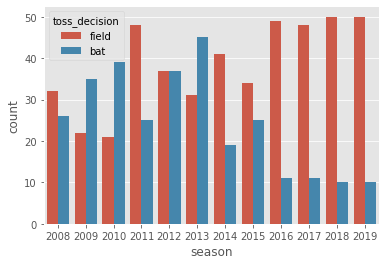

In [22]:
plt.style.use('ggplot')
sns.countplot(x='season',hue='toss_decision',data=match)

### Teams who won most tosses

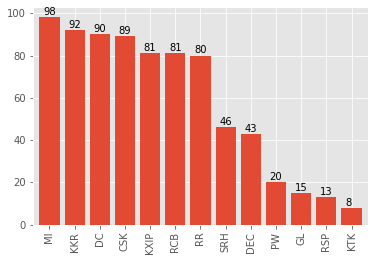

In [23]:
###maximum toss winners:
ax = match['toss_winner'].value_counts().plot.bar(width=0.8)

for fig in ax.patches:
    ax.annotate(format(fig.get_height()), (fig.get_x()+0.15, fig.get_height()+1))
    
plt.show()

### Toss Winner == Match winner?

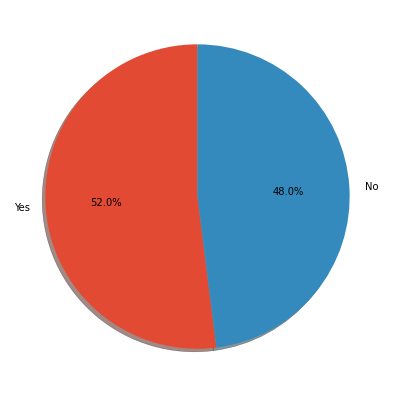

In [24]:
### toss winner also match winner??
df = match[match['toss_winner']==match['winner']]

slices = [len(df),756-len(df)]
labels = ['Yes', 'No']

plt.pie(slices, labels=labels, shadow=True, startangle=90, explode=(0,0), autopct= '%.1f%%')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

<AxesSubplot:xlabel='season', ylabel='count'>

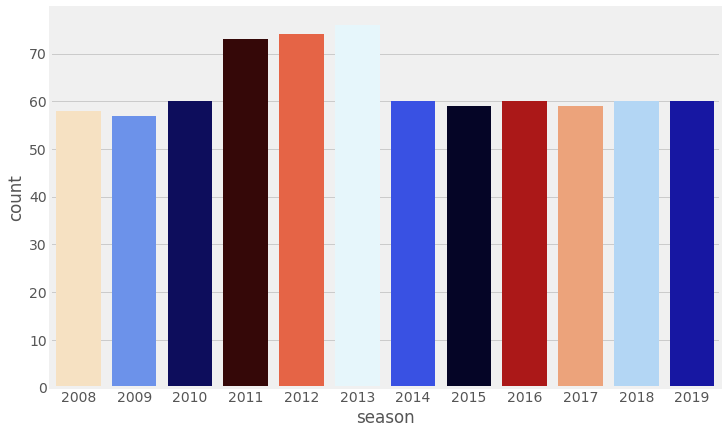

In [25]:
## matches played across each season
plt.figure(figsize=(12,7))
plt.style.use('fivethirtyeight')
sns.countplot(x='season', data=match, palette='flag')

### All the matches that were played in a season were almost equal. Except in 2011-13, there were many matches played, due to more teams participating.

### Runs scored in a season

In [26]:
batsmen = match[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id',
                                    how='left').drop('id', axis=1)
# batsmen

<AxesSubplot:xlabel='season'>

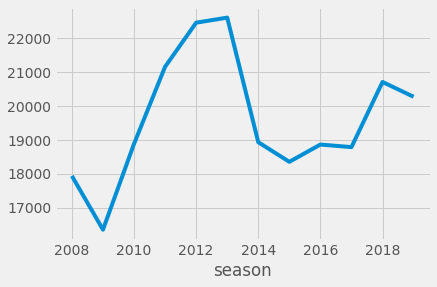

In [27]:
season = batsmen.groupby('season')['total_runs'].sum()

season.plot()

### Many runs were scored in the season 2011-13. It is because the teams that played in IPL were more compartively.

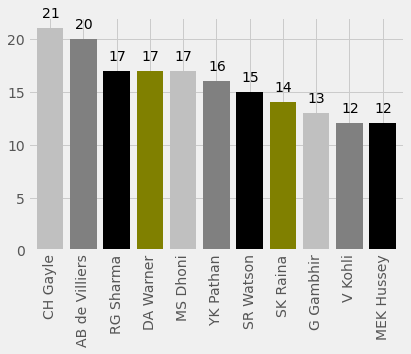

In [28]:
# maximum man of matches
ax = match['player_of_match'].value_counts().head(11).plot.bar(width=0.8, color=['#C0C0C0', '#808080', '#000000', '#808000'])

for fig in ax.patches:
    ax.annotate(format(fig.get_height()), (fig.get_x()+0.15, fig.get_height()+1))
plt.show()

###### Chris Gayle has won most man of the match awards followed by ABD.

### Winners in Each Season

In [29]:

## getting the last match of each season and their winner
for i in range(2008,2020):
    df = ((match[match['season']==i]).iloc[-1])
    print(df[[1,10]])

season    2008
winner      RR
Name: 116, dtype: object
season    2009
winner     DEC
Name: 173, dtype: object
season    2010
winner     CSK
Name: 233, dtype: object
season    2011
winner     CSK
Name: 306, dtype: object
season    2012
winner     KKR
Name: 380, dtype: object
season    2013
winner      MI
Name: 456, dtype: object
season    2014
winner     KKR
Name: 516, dtype: object
season    2015
winner      MI
Name: 575, dtype: object
season    2016
winner     SRH
Name: 635, dtype: object
season    2017
winner      MI
Name: 58, dtype: object
season    2018
winner     CSK
Name: 695, dtype: object
season    2019
winner      MI
Name: 755, dtype: object


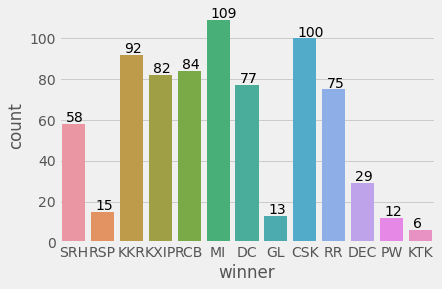

In [30]:
## matches won by each team

# ax = match['winner'].value_counts().plot.bar(width=0.8, color=['#C2E2E2'])
ay = sns.countplot(x='winner', data=match)
for fig in ay.patches:
    ay.annotate(format(fig.get_height()), (fig.get_x()+0.15, fig.get_height()+1))
                
plt.show()

### MI leads the most match wins in IPL History.

## Looking at the dominance of MI against two big teams

<AxesSubplot:xlabel='season', ylabel='count'>

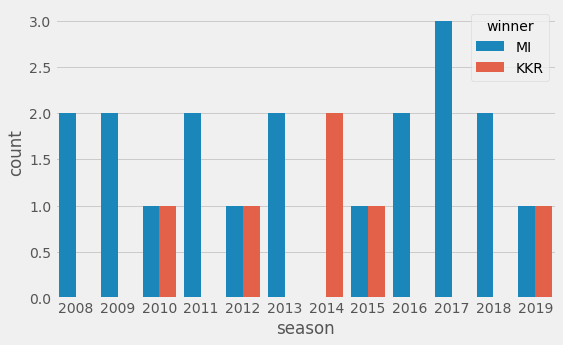

In [31]:
### team 1 vs team 2 

mi_vs_kkr = match[((match['team1']=='MI') | (match['team2']=='MI')) & 
            ((match['team1']=='KKR') | (match['team2']=='KKR'))] 
plt.figure(figsize=(8,5))
sns.countplot(x='season', hue='winner', data= mi_vs_kkr)

### MI and KKR have faced each other two times in each season except in 2017, where they also met in playoff round. MI look dominating having won 19 times againts KKR 6 wins.

In [32]:
mi_vs_csk = match[((match['team1']=='MI') | (match['team2']=='MI')) &
                  ((match['team1']=='CSK') | (match['team2']=='CSK'))
                 ]

<AxesSubplot:xlabel='season', ylabel='count'>

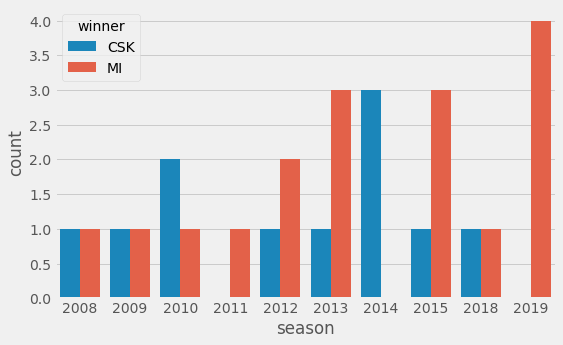

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='season', hue='winner', data=mi_vs_csk)

### MI and CSK have met at 27 occasions; Their Head to head record stands at: - MI-16: CSK-11.
### You can bet on entertainment factor when these giants teams collides.

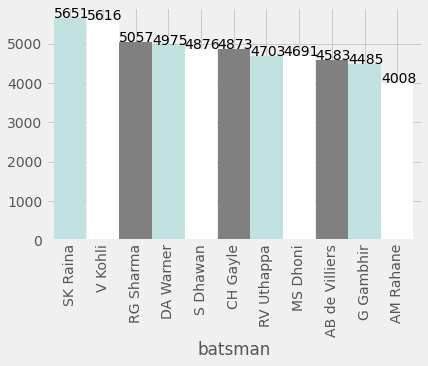

In [34]:
# batsmen who scored most runs in the ipl
ora = delivery.groupby('batsman')['total_runs'].sum().reset_index().sort_values(by='total_runs', ascending=False)
ora
# ax = ora.head(11).plot.bar(width=0.8, color=['#C2E2E2'])
# ax.set_xlabel(batsman)
ax = ora.set_index('batsman')['total_runs'].nlargest(11).plot.bar(width=0.99, color=['#C2E2E2', '#FFFFFF', '#808080'])

for fig in ax.patches:
    ax.annotate(format(fig.get_height()), (fig.get_x()+0.0, fig.get_height()+1.5))

### Suresh Raina has most runs in IPL history followed by Virat Kohli and Rohit Sharma.
### There are a total of 8 players in top 11, Which shows the dominance of Indian batsman in the League.

In [35]:
oran = match[['id', 'season']].merge((delivery[['match_id', 'batsman', 'total_runs']]), left_on='id', right_on='match_id',
                                   how='left').drop('id', axis=1)
ora

,batsman,total_runs
428,SK Raina,5651
486,V Kohli,5616
367,RG Sharma,5057
112,DA Warner,4975
392,S Dhawan,4876
...,...,...
182,J Denly,0
487,V Pratap Singh,0
55,Abdur Razzak,0
463,Sunny Gupta,0


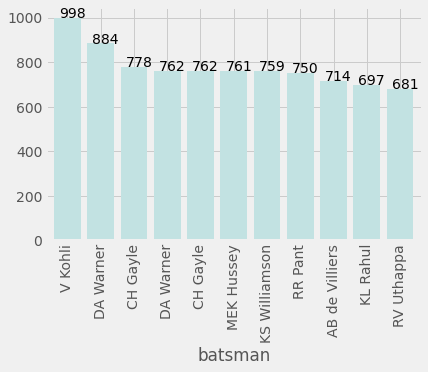

In [36]:

orange = oran.groupby(['season','batsman'])['total_runs'].sum().reset_index().sort_values(by='total_runs', ascending=False).head(33)



orange = orange.set_index('batsman')['total_runs'].nlargest(11).plot.bar(width=0.8, color='#C2E2E2')

for fig in orange.patches:
    orange.annotate(format(fig.get_height()), (fig.get_x()+0.15, fig.get_height()+1))

# sns.countplot(x='total_runs', hue='season', data=orange)

### Virat Kohli has most runs in a season followed by D. Warner.

### most 200+ scores

In [37]:
high_scores = delivery.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1370,7937,1,KKR,KXIP,250
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
1498,11338,1,KKR,MI,241
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
1426,11147,1,SRH,RCB,233
596,296,1,KXIP,RCB,232
1500,11339,1,SRH,KXIP,232


In [38]:
### 200+scores

highest_scores = delivery.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()
highest_scores

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RSP,187
4,3,1,GL,183
...,...,...,...,...
1523,11413,2,DC,170
1524,11414,1,DC,155
1525,11414,2,CSK,162
1526,11415,1,MI,152


In [39]:
# highest_scores.set_index(['match_id'], inplace=True)
highest_scores.columns

Index(['match_id', 'inning', 'batting_team', 'total_runs'], dtype='object')

In [40]:
high = highest_scores[highest_scores['total_runs']>200].groupby(['inning', 'batting_team']).count()

In [41]:
high.rename(columns={'total_runs': 'count'}).T

inning         1                                     2                        \
batting_team CSK DC DEC GL KKR KXIP  MI RCB RR SRH CSK DC KKR KXIP MI RCB RR   
match_id      10  6   1  1   7    8  10  15  5   8   6  2   2    6  4   2  3   
count         10  6   1  1   7    8  10  15  5   8   6  2   2    6  4   2  3   

inning            
batting_team SRH  
match_id       2  
count          2

### RCB leads the way for most 200+ scores.

### But, let's see whether scoring 200+ score in the first inning, would give high chances of winning?

In [42]:
### now we want to know if 2nd inning team chased 200+ scores
highscores = delivery.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()

highscores1 = highscores[highscores['inning']==1]
highscores2 = highscores[highscores['inning']==2]

highscores1 = highscores1.merge(highscores2[['match_id', 'inning', 'total_runs']], on = 'match_id')
highscores1

,match_id,inning_x,batting_team,bowling_team,total_runs_x,inning_y,total_runs_y
0,1,1,SRH,RCB,207,2,172
1,2,1,MI,RSP,184,2,187
2,3,1,GL,KKR,183,2,184
3,4,1,RSP,KXIP,163,2,164
4,5,1,RCB,DC,157,2,142
...,...,...,...,...,...,...,...
749,11347,1,KKR,MI,143,2,137
750,11412,1,CSK,MI,136,2,140
751,11413,1,SRH,DC,171,2,170
752,11414,1,DC,CSK,155,2,162


In [43]:
highscores1.rename(columns={'inning_x': 'inning_1',
                            'inning_y': 'inning_2',
                            'total_runs_x': 'inning1_score',
                            'total_runs_y': 'inning2_score'}, inplace=True)

highscores1 = highscores1[highscores1['inning1_score']>200]
highscores1

,match_id,inning_1,batting_team,bowling_team,inning1_score,inning_2,inning2_score
0,1,1,SRH,RCB,207,2,172
8,9,1,DC,RSP,205,2,108
19,20,1,RCB,GL,213,2,192
31,32,1,SRH,KXIP,207,2,181
35,36,1,SRH,KKR,209,2,161
...,...,...,...,...,...,...,...
717,11315,1,KXIP,MI,204,2,210
728,11326,1,RCB,KKR,219,2,219
735,11333,1,RCB,KXIP,213,2,190
740,11338,1,KKR,MI,241,2,204


In [44]:
highscores1['is_score_chased']=1
highscores1['is_score_chased'] = np.where(highscores1['inning1_score']<=highscores1['inning2_score'], 'yes', 'no')

<ipython-input-44-5d6f589b7f5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highscores1['is_score_chased']=1
<ipython-input-44-5d6f589b7f5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highscores1['is_score_chased'] = np.where(highscores1['inning1_score']<=highscores1['inning2_score'], 'yes', 'no')


In [45]:
highscores1

,match_id,inning_1,batting_team,bowling_team,inning1_score,inning_2,inning2_score,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DC,RSP,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no
...,...,...,...,...,...,...,...,...
717,11315,1,KXIP,MI,204,2,210,yes
728,11326,1,RCB,KKR,219,2,219,yes
735,11333,1,RCB,KXIP,213,2,190,no
740,11338,1,KKR,MI,241,2,204,no


In [46]:
### ratio of chasing the mammoth score of 200+
# slices = highscores1['is_score_chased'].value_counts().reset_index().is_score_chased
# list(slices)

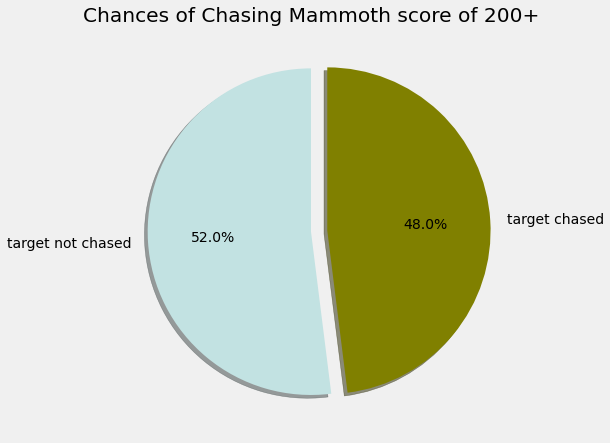

In [47]:
labels = ['target not chased', 'target chased']
plt.pie(slices, labels=labels, colors=['#C2E2E2', '#808000'], startangle=90, shadow=True, explode=(0,0.1), autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.title('Chances of Chasing Mammoth score of 200+')
plt.show()

### According to history, if a team scores 200+ in the first inning; there is 83.1% chance that they would win.

### All time leading wicket takers.

In [48]:
## all time leading wicket takers

delivery['dismissal_kind'].value_counts()

0                        170244
caught                     5348
bowled                     1581
run out                     852
lbw                         540
stumped                     278
caught and bowled           211
retired hurt                 12
hit wicket                   10
obstructing the field         2
Name: dismissal_kind, dtype: int64

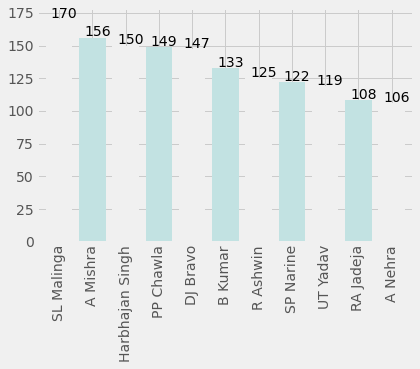

In [49]:
dismissal = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

most_wickets = delivery[delivery['dismissal_kind'].isin(dismissal)]
ax = most_wickets['bowler'].value_counts()[:11].plot.bar(width=0.8, color=['#F0F0F0', '#C2E2E2'])

for fig in ax.patches:
    ax.annotate(format(fig.get_height()), (fig.get_x()+0.15, fig.get_height()+1))

### It is no surprise thtat L. Malinga leads the chart for most wickets in IPL History.

### Teams with maximum sixes in IPL History.

In [50]:
### teams with maximum sixes
pd.set_option('Display.max_columns',None)
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


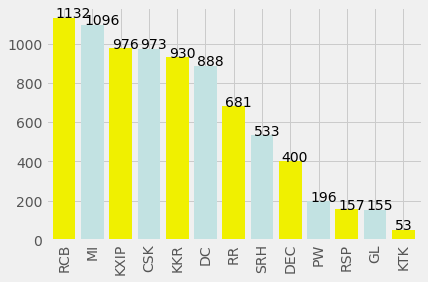

In [51]:
ax = delivery[delivery['batsman_runs']==6].batting_team.value_counts().plot.bar(width=0.8, color=['#F0F000', '#C2E2E2'])

for fig in ax.patches:
    ax.annotate(format(fig.get_height()), (fig.get_x()+0.10, fig.get_height()+1))


## No wonder RCB leads this chart as they have Kohli, ABD and Gayle factor.
## MI is slightly behind them and with the form they play in, it would not be a surprise, if they would  top this chart in future.

### That's all from my side. Thank You!